## According to the instruction the below is needed to install the dataset and run the import check

In [31]:
!pip3 install -U ucimlrepo

## Import dependencies

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [33]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

This was a continued error due to the dataset not being simple. The two X, y axis caused several errors.  Gen AI was used to fix this error

In [34]:
# Assuming X and y are pandas DataFrames or compatible formats
# Concatenate X and y to form a single DataFrame
# axis=1 indicates you want to concatenate columns (side by side)
# You might want to ensure that X and y have the same number of rows
df = pd.concat([X, y], axis=1)

# Now, df is your complete DataFrame containing both features and targets
# Print all column names in the DataFrame
print(df.columns)
print(df.head(10))
print(df.shape)
print(df.dtypes)
print(df.describe())


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.0

In [35]:
# Display a concise summary of the DataFrame, including the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


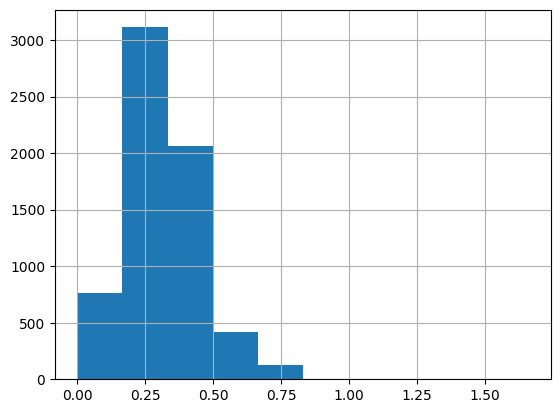

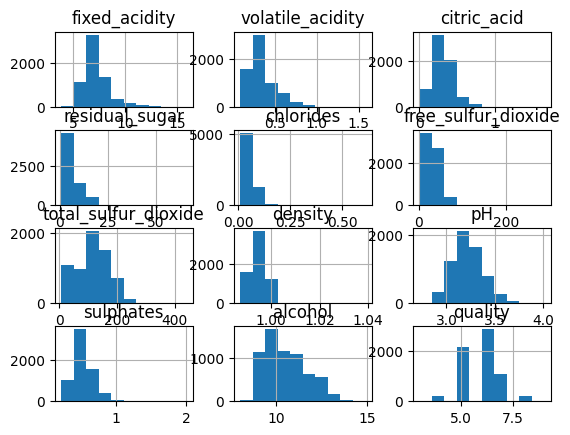

In [36]:
# Inspect histogram by numerical column
df['citric_acid'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Save the figure
plt.savefig('figures/dataset.png')  # Saves to the file in the current directory

# Show all plots
plt.show()

In [37]:
# Inspect value counts by categorical column
# this dateset has no catagorical columns, despite 'color' being annotated when imported.
# think of a way to build a catagorical scale (quality = 5 point scale)

In [38]:
# Rename a column from 'old_name' to 'new_name'
df = df.rename(columns={'alcohol': 'new_name_alcohol'})

# Display a concise summary of the DataFrame, including the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  new_name_alcohol      6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [39]:
# Add a new column 'sum_column' that is the sum of 'col1' and 'col2'
df['sum_column'] = df['new_name_alcohol'] + df['quality']

# Display a concise summary of the DataFrame, including the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  new_name_alcohol      6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  sum_column            6497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 660.0 KB


In [40]:
# Function to map quality to a 5-point Likert scale
def quality_to_quality_scale(quality):
    if quality <= 2:
        return '1 - Very Low'
    elif quality <= 4:
        return '2 - Low'
    elif quality <= 6:
        return '3 - Medium'
    elif quality <= 8:
        return '4 - High'
    else:
        return '5 - Very High'

# Assuming 'df' is your DataFrame and 'quality' is the column you want to convert
# Create a new column 'quality_scale' by applying the function to the 'quality' column
df['quality_scale'] = df['quality'].apply(quality_to_quality_scale)

# Display the first few rows to verify the transformation
print(df[['quality', 'quality_scale']].head())


   quality quality_scale
0        5    3 - Medium
1        5    3 - Medium
2        5    3 - Medium
3        6    3 - Medium
4        5    3 - Medium


In [41]:
# Display a concise summary of the DataFrame, including the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  new_name_alcohol      6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  sum_column            6497 non-null   float64
 13  quality_scale         6497 non-null   object 
dtypes: float64(12), int64(1), object(1)
memory usage: 710.7+ KB


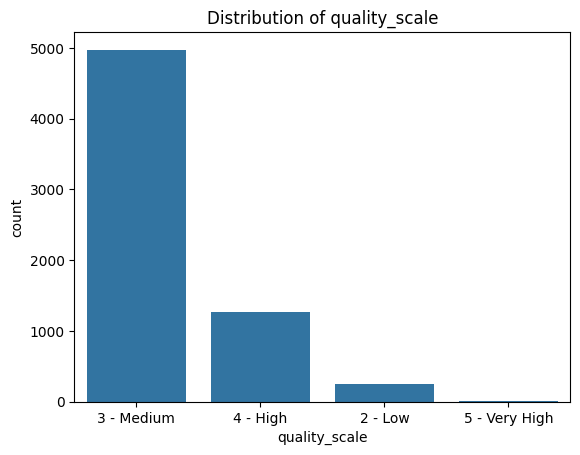

In [42]:
# Inspect value counts by categorical column
df['quality_scale'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.savefig('figures/quality_scale.png')  # Saves to the file "*.png" in the figures directory
    plt.show()

### Subsection 1: Distribution of Wine Quality
Goal:    
To explore the distribution of wine quality scores across the dataset

Chart Ty    pe:
Histogram

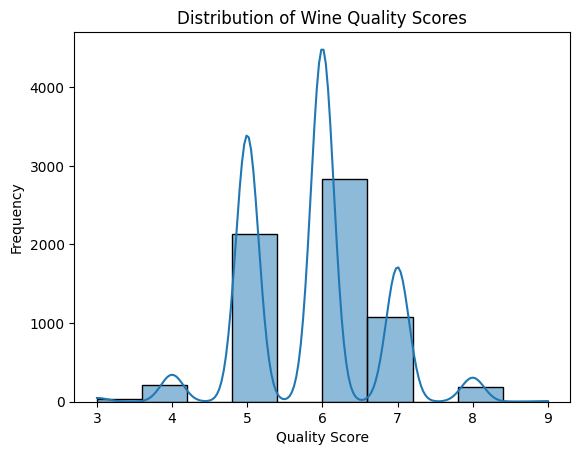

In [43]:
sns.histplot(data=df, x='quality', bins=10, kde=True)
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.savefig('figures/Distribution of Wine Quality Scores.png')  # Saves to the file "my_figure.png" in the current directory
plt.show()

### Subsection 2: Relationship Between Alcohol Content and Wine Quality

Goal:    
To investigate if there's a relationship between the alcohol content of the wine and its quality score

Chart Ty    pe:
Scatter Plot

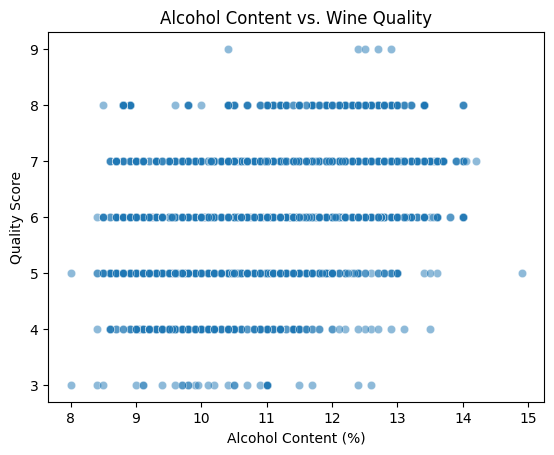

In [44]:
sns.scatterplot(data=df, x='new_name_alcohol', y='quality', alpha=0.5)
plt.title('Alcohol Content vs. Wine Quality')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Quality Score')
plt.savefig('figures/Alcohol Content vs. Wine Quality.png')  # Saves to the file "my_figure.png" in the current directory
plt.show()

### Subsection 3: Average Sulphates Content Across Different Quality Categories
Goal:    
To compare the average sulphates content across wines of different quality categories defined by the Likert scale

Chart Ty    pe:
Bar Chart

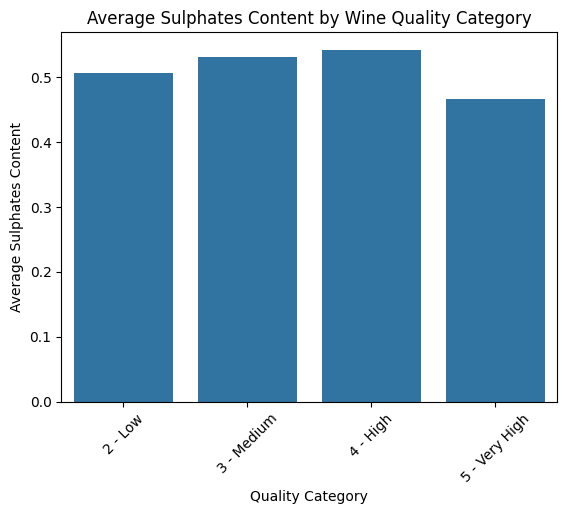

In [45]:
# Calculate mean sulphates for each Likert scale category
mean_sulphates_by_likert = df.groupby('quality_scale')['sulphates'].mean().reset_index()

sns.barplot(data=mean_sulphates_by_likert, x='quality_scale', y='sulphates')
plt.title('Average Sulphates Content by Wine Quality Category')
plt.xlabel('Quality Category')
plt.ylabel('Average Sulphates Content')
plt.xticks(rotation=45)
plt.savefig('figures/Average Sulphates Content by Wine Quality Category.png')  # Saves to the file in the figures directory
plt.show()

### Subsection 4: Impact of Acidity on Wine Quality
Goal:    
To explore how different levels of acidity (fixed acidity, volatile acidity, and citric acid) impact wine quality.

Chart Ty     pe:
Pair Plot

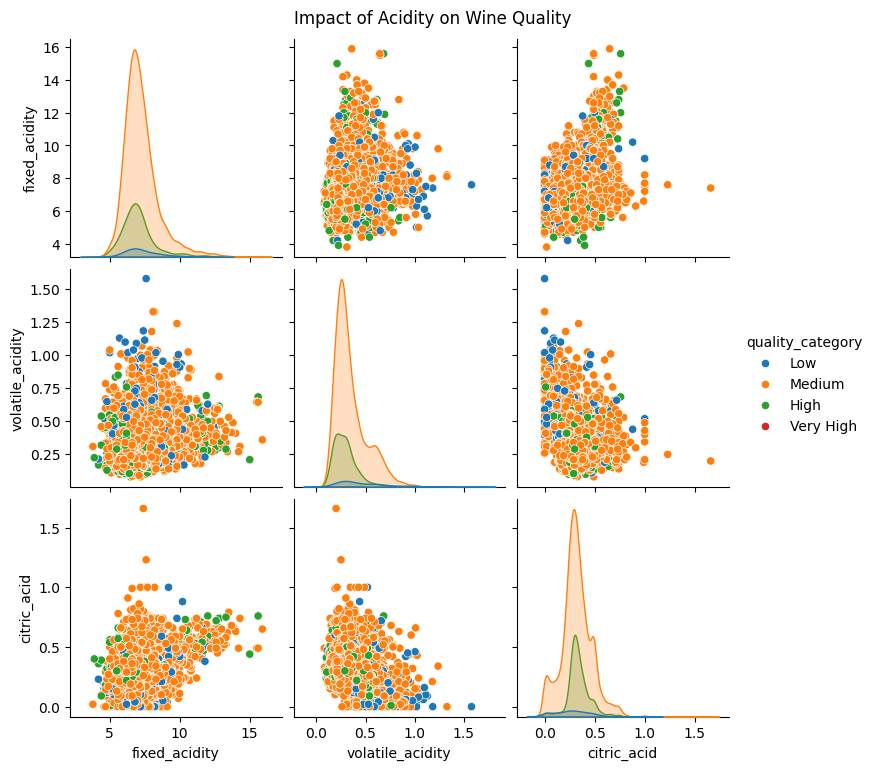

In [46]:
# Create a copy of the DataFrame to avoid setting with copy warning when creating a new column
subset_df = df.copy()

# Convert 'quality' into a categorical column for coloring
subset_df['quality_category'] = pd.cut(subset_df['quality'], bins=[2, 4, 6, 8, 10], labels=['Low', 'Medium', 'High', 'Very High'], include_lowest=True)

# Now, you can use seaborn's pairplot with the new 'quality_category' column for coloring
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(subset_df, hue='quality_category', vars=['fixed_acidity', 'volatile_acidity', 'citric_acid'])
plt.suptitle('Impact of Acidity on Wine Quality', y=1.02)
plt.savefig('figures/Impact_of_Acidity_on_Wine_Quality.png')  # Corrected file path format
plt.show()
